<a href="https://colab.research.google.com/github/jonnie763/DATA-602-Intro-to-Data-Analysis-and-Machine-Learning/blob/main/ECON_642_Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt        #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.

import pandas as pd

import numpy as np

import plotly.graph_objects as go

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

import math

import seaborn as sn

plt.rcParams['figure.figsize'] = 7, 7 #Increase general size for matplot.lib

In [2]:
I_RATE= pd.read_csv("/content/2024-12-16T15-09_export.csv") # Read csv using this code, print df

I_RATE                              # Federal Interest Rate dataframe

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GBR,United Kingdom,cgdpo,Output-side real GDP at current PPPs (in mil. ...,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,5.702926e+05,5.889346e+05,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
1,GBR,United Kingdom,cn,Capital stock at current PPPs (in mil. 2017US$),1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1.615829e+06,1.702176e+06,...,1.097681e+07,1.050149e+07,1.153944e+07,1.295424e+07,1.289937e+07,1.392311e+07,1.347386e+07,1.370632e+07,1.391524e+07,1.414660e+07
2,GBR,United Kingdom,labsh,Share of labour compensation in GDP at current...,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,...,5.992809e-01,5.968910e-01,5.912898e-01,5.955293e-01,5.849596e-01,5.850752e-01,5.862053e-01,5.870172e-01,5.896447e-01,5.896447e-01
3,GBR,United Kingdom,pop,Population (in millions),5.007425e+01,5.023708e+01,5.037693e+01,5.053975e+01,5.071157e+01,5.089238e+01,...,6.345981e+01,6.402192e+01,6.452531e+01,6.498402e+01,6.542305e+01,6.586015e+01,6.629794e+01,6.672746e+01,6.714168e+01,6.753017e+01
4,KOR,Republic of Korea,cgdpo,Output-side real GDP at current PPPs (in mil. ...,NaN,NaN,NaN,2.468104e+04,2.556636e+04,2.744558e+04,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
5,KOR,Republic of Korea,cn,Capital stock at current PPPs (in mil. 2017US$),NaN,NaN,NaN,2.133333e+05,2.136151e+05,2.101663e+05,...,7.213039e+06,7.190924e+06,7.693654e+06,8.144688e+06,8.675896e+06,9.110202e+06,9.397864e+06,9.973875e+06,1.030948e+07,1.063583e+07
6,KOR,Republic of Korea,labsh,Share of labour compensation in GDP at current...,NaN,NaN,NaN,6.467701e-01,6.467701e-01,6.467701e-01,...,4.958703e-01,5.037408e-01,5.085257e-01,5.114167e-01,5.181786e-01,5.215386e-01,5.199910e-01,5.172493e-01,5.172493e-01,5.172493e-01
7,KOR,Republic of Korea,pop,Population (in millions),NaN,NaN,NaN,2.103086e+01,2.122895e+01,2.152154e+01,...,4.954564e+01,4.978616e+01,5.006064e+01,5.034572e+01,5.060791e+01,5.082309e+01,5.098346e+01,5.109642e+01,5.117171e+01,5.122531e+01


## United Kingdom Graphs


##1) UK GDP Growth


In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/2024-12-16T15-09_export.csv")

# Search for rows where a specific column contains the string "Alice"
search_string = "United Kingdom"

rows_with_string = df[df.apply(lambda row: row.astype(str).str.contains(search_string).any(), axis=1)]

print(rows_with_string)

  ISO code         Country Variable code  \
0      GBR  United Kingdom         cgdpo   
1      GBR  United Kingdom            cn   
2      GBR  United Kingdom         labsh   
3      GBR  United Kingdom           pop   

                                       Variable name          1950  \
0  Output-side real GDP at current PPPs (in mil. ...  5.030215e+05   
1    Capital stock at current PPPs (in mil. 2017US$)  1.330191e+06   
2  Share of labour compensation in GDP at current...  5.514318e-01   
3                           Population (in millions)  5.007425e+01   

           1951          1952          1953          1954          1955  ...  \
0  5.183552e+05  5.207453e+05  5.504048e+05  5.702926e+05  5.889346e+05  ...   
1  1.419656e+06  1.476983e+06  1.545314e+06  1.615829e+06  1.702176e+06  ...   
2  5.514318e-01  5.514318e-01  5.514318e-01  5.514318e-01  5.514318e-01  ...   
3  5.023708e+01  5.037693e+01  5.053975e+01  5.071157e+01  5.089238e+01  ...   

           2010          20

In [4]:
df_2=df.iloc[[0,3]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GBR,United Kingdom,cgdpo,Output-side real GDP at current PPPs (in mil. ...,503021.468750,518355.187500,520745.343750,550404.812500,570292.625000,588934.562500,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
3,GBR,United Kingdom,pop,Population (in millions),50.074245,50.237076,50.376928,50.539755,50.711574,50.892384,...,6.345981e+01,6.402192e+01,6.452531e+01,6.498402e+01,6.542305e+01,6.586015e+01,6.629794e+01,6.672746e+01,6.714168e+01,6.753017e+01


In [5]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,503021.468750,518355.187500,520745.343750,550404.812500,570292.625000,588934.562500,599574.562500,609784.375000,615616.125000,634981.312500,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
3,50.074245,50.237076,50.376928,50.539755,50.711574,50.892384,51.130132,51.375876,51.597642,51.901323,...,6.345981e+01,6.402192e+01,6.452531e+01,6.498402e+01,6.542305e+01,6.586015e+01,6.629794e+01,6.672746e+01,6.714168e+01,6.753017e+01


In [6]:
new_row = new_df.iloc[0] / new_df.iloc[1]

# Append the new row to the DataFrame
new_df.loc['New'] = new_row

new_row

,0
1950,10045.512717
1951,10318.179924
1952,10336.980943
1953,10890.531963
1954,11245.807911
...,...
2015,42374.215204
2016,42614.413503
2017,44093.933830
2018,44300.743187


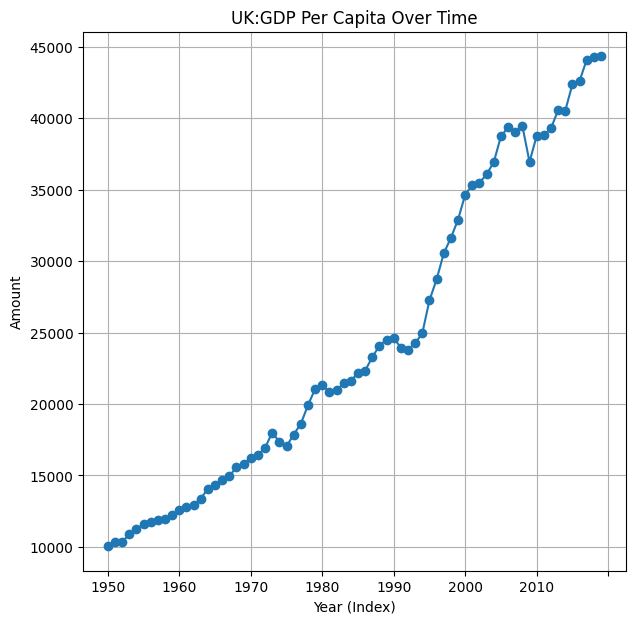

In [7]:

new_row.plot(kind='line', marker='o', title='UK:GDP Per Capita Over Time')

# Add labels and grid

plt.xlabel('Year (Index)')

plt.ylabel('Amount')

plt.grid(True)

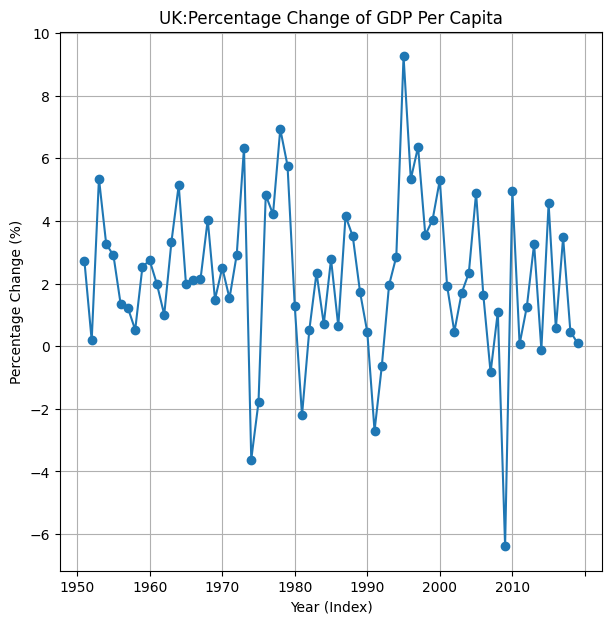

Average Growth Rate: 2.21%
Compound Annual Growth Rate (CAGR): 2.14%


In [8]:
# prompt: calculate the rate of growth from above

# ... (your existing code) ...

# Calculate the percentage change
percent_change = new_row.pct_change() * 100

# Plotting the percentage change
percent_change.plot(kind='line', marker='o', title='UK:Percentage Change of GDP Per Capita')

plt.xlabel('Year (Index)')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

# Calculate the average growth rate
average_growth_rate = percent_change.mean()
print(f"Average Growth Rate: {average_growth_rate:.2f}%")

# Calculate the compound annual growth rate (CAGR)
# Assuming the data represents yearly values
num_periods = len(new_row)  # Number of years
cagr = (new_row.iloc[-1] / new_row.iloc[0])**(1/num_periods) -1
cagr_percentage = cagr*100
print(f"Compound Annual Growth Rate (CAGR): {cagr_percentage:.2f}%")

## 2) UK Capital Stock

In [9]:
df_2=df.iloc[[0,1]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GBR,United Kingdom,cgdpo,Output-side real GDP at current PPPs (in mil. ...,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,570292.625,5.889346e+05,...,2460576.25,2483983.5,2535151.75,2636543.75,2651424.5,2790772.0,2825248.0,2942276.25,2974426.5,2994405.75
1,GBR,United Kingdom,cn,Capital stock at current PPPs (in mil. 2017US$),1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1615828.875,1.702176e+06,...,10976813.00,10501493.0,11539438.00,12954237.00,12899374.0,13923109.0,13473861.0,13706323.00,13915238.0,14146595.00


In [10]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,570292.625,5.889346e+05,5.995746e+05,609784.375,615616.125,6.349813e+05,...,2460576.25,2483983.5,2535151.75,2636543.75,2651424.5,2790772.0,2825248.0,2942276.25,2974426.5,2994405.75
1,1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1615828.875,1.702176e+06,1.784444e+06,1867226.125,1936080.750,2.017196e+06,...,10976813.00,10501493.0,11539438.00,12954237.00,12899374.0,13923109.0,13473861.0,13706323.00,13915238.0,14146595.00


In [11]:
new_row = new_df.iloc[1] / new_df.iloc[0]

# Append the new row to the DataFrame
new_df.loc['New'] = new_row

new_row

,0
1950,2.644402
1951,2.738770
1952,2.836287
1953,2.807596
1954,2.833333
...,...
2015,4.988981
2016,4.769090
2017,4.658408
2018,4.678293


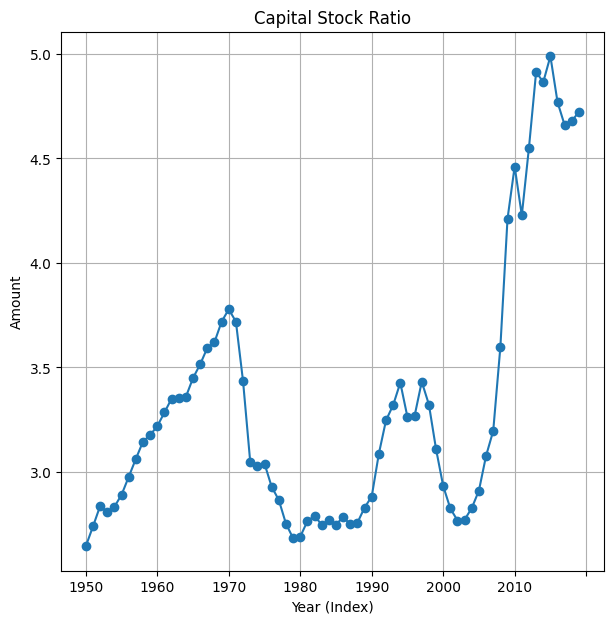

In [12]:
new_row.plot(kind='line', marker='o', title='Capital Stock Ratio')

# Add labels and grid

plt.xlabel('Year (Index)')

plt.ylabel('Amount')

plt.grid(True)

## 3) U.K Labor and Capital Share

In [13]:
df_2=df.iloc[[2]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,GBR,United Kingdom,labsh,Share of labour compensation in GDP at current...,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,...,0.599281,0.596891,0.59129,0.595529,0.58496,0.585075,0.586205,0.587017,0.589645,0.589645


In [14]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,...,0.599281,0.596891,0.59129,0.595529,0.58496,0.585075,0.586205,0.587017,0.589645,0.589645


In [15]:
# prompt: Create a row of 1 minus the values of the row above

# Calculate the difference between consecutive rows
diff_row = 1 - new_df.iloc[0]

# Append the new row to the DataFrame
new_df.loc['Capital Share'] = diff_row

new_df

<ipython-input-15-2c82dfe0dba5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc['Capital Share'] = diff_row


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,0.551432,...,0.599281,0.596891,0.59129,0.595529,0.58496,0.585075,0.586205,0.587017,0.589645,0.589645
Capital Share,0.448568,0.448568,0.448568,0.448568,0.448568,0.448568,0.448568,0.448568,0.448568,0.448568,...,0.400719,0.403109,0.40871,0.404471,0.41504,0.414925,0.413795,0.412983,0.410355,0.410355


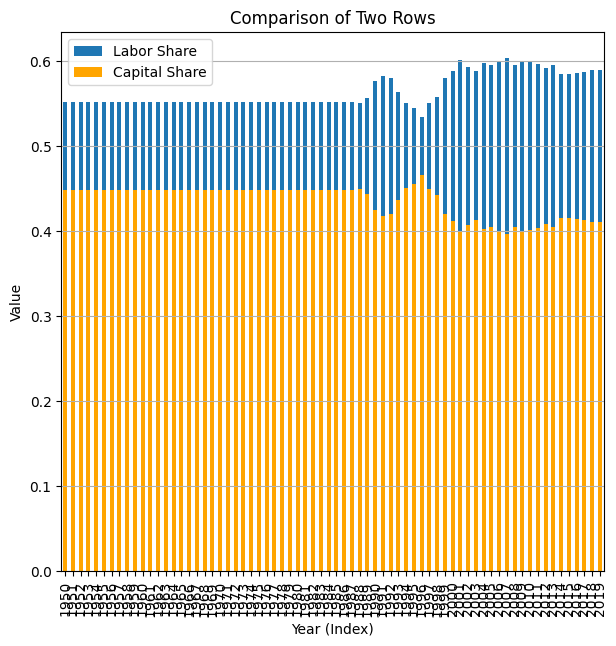

In [16]:
# prompt: bar graph of the two rows new_df comparing them

new_df.iloc[0].plot(kind='bar', label='Labor Share')

new_df.iloc[1].plot(kind='bar', label='Capital Share', color='orange')  # Use alpha for transparency

plt.xlabel('Year (Index)')
plt.ylabel('Value')
plt.title('Comparison of Two Rows')
plt.legend()
plt.grid(axis='y') #Add gridlines for better readability
plt.show()

## 4) U.K Average rate of Capital Return

In [17]:
df_2=df.iloc[[0,1,2]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GBR,United Kingdom,cgdpo,Output-side real GDP at current PPPs (in mil. ...,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,5.702926e+05,5.889346e+05,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
1,GBR,United Kingdom,cn,Capital stock at current PPPs (in mil. 2017US$),1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1.615829e+06,1.702176e+06,...,1.097681e+07,1.050149e+07,1.153944e+07,1.295424e+07,1.289937e+07,1.392311e+07,1.347386e+07,1.370632e+07,1.391524e+07,1.414660e+07
2,GBR,United Kingdom,labsh,Share of labour compensation in GDP at current...,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,...,5.992809e-01,5.968910e-01,5.912898e-01,5.955293e-01,5.849596e-01,5.850752e-01,5.862053e-01,5.870172e-01,5.896447e-01,5.896447e-01


In [18]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,5.702926e+05,5.889346e+05,5.995746e+05,6.097844e+05,6.156161e+05,6.349813e+05,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
1,1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1.615829e+06,1.702176e+06,1.784444e+06,1.867226e+06,1.936081e+06,2.017196e+06,...,1.097681e+07,1.050149e+07,1.153944e+07,1.295424e+07,1.289937e+07,1.392311e+07,1.347386e+07,1.370632e+07,1.391524e+07,1.414660e+07
2,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,...,5.992809e-01,5.968910e-01,5.912898e-01,5.955293e-01,5.849596e-01,5.850752e-01,5.862053e-01,5.870172e-01,5.896447e-01,5.896447e-01


In [19]:
diff_row = 1 - new_df.iloc[2]

# Append the new row to the DataFrame
new_df.loc['Capital Share'] = diff_row

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,5.702926e+05,5.889346e+05,5.995746e+05,6.097844e+05,6.156161e+05,6.349813e+05,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
1,1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1.615829e+06,1.702176e+06,1.784444e+06,1.867226e+06,1.936081e+06,2.017196e+06,...,1.097681e+07,1.050149e+07,1.153944e+07,1.295424e+07,1.289937e+07,1.392311e+07,1.347386e+07,1.370632e+07,1.391524e+07,1.414660e+07
2,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,...,5.992809e-01,5.968910e-01,5.912898e-01,5.955293e-01,5.849596e-01,5.850752e-01,5.862053e-01,5.870172e-01,5.896447e-01,5.896447e-01
Capital Share,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,4.485682e-01,...,4.007191e-01,4.031090e-01,4.087102e-01,4.044707e-01,4.150404e-01,4.149248e-01,4.137947e-01,4.129828e-01,4.103553e-01,4.103553e-01


In [20]:
# prompt: Capital share mulitiplied by first row

capital_share = new_df.loc['Capital Share']
first_row = new_df.iloc[0]

multiplied_result = capital_share * first_row
multiplied_result

,0
1950,2.256394e+05
1951,2.325176e+05
1952,2.335898e+05
1953,2.468941e+05
1954,2.558151e+05
...,...
2015,1.157961e+06
2016,1.169073e+06
2017,1.215109e+06
2018,1.220572e+06


In [21]:
# prompt: multiplied_result by divided by second row of new_df

divided_result = multiplied_result / new_df.iloc[1]
divided_result

,0
1950,0.169629
1951,0.163785
1952,0.158153
1953,0.159769
1954,0.158318
...,...
2015,0.083168
2016,0.086766
2017,0.088653
2018,0.087715


In [22]:
# prompt: multiply divided_result by hundred

hundred_times_divided_result = divided_result * 100
hundred_times_divided_result

,0
1950,16.962937
1951,16.378455
1952,15.815329
1953,15.976947
1954,15.831820
...,...
2015,8.316824
2016,8.676597
2017,8.865320
2018,8.771475


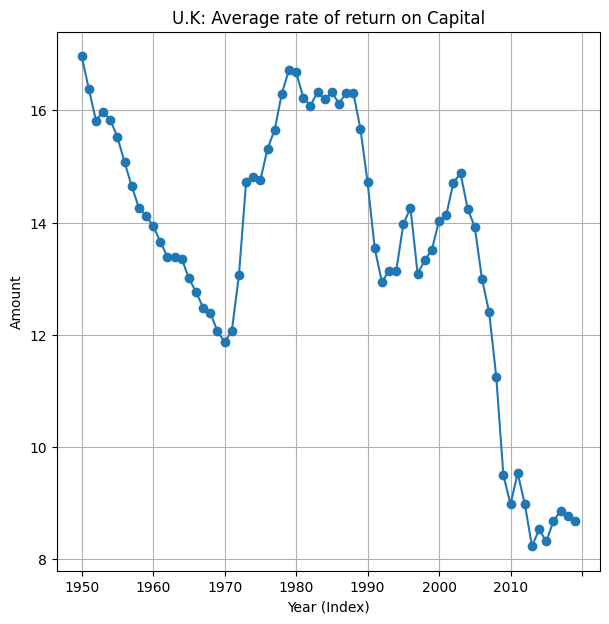

In [23]:
hundred_times_divided_result.plot(kind='line', marker='o', title='U.K: Average rate of return on Capital')

# Add labels and grid

plt.xlabel('Year (Index)')

plt.ylabel('Amount')

plt.grid(True)

## South Korea Graphs


## 1) South Korea GDP Growth

In [24]:
I_RATE= pd.read_csv("/content/2024-12-16T15-09_export.csv") # Read csv using this code, print df

I_RATE

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GBR,United Kingdom,cgdpo,Output-side real GDP at current PPPs (in mil. ...,5.030215e+05,5.183552e+05,5.207453e+05,5.504048e+05,5.702926e+05,5.889346e+05,...,2.460576e+06,2.483984e+06,2.535152e+06,2.636544e+06,2.651424e+06,2.790772e+06,2.825248e+06,2.942276e+06,2.974426e+06,2.994406e+06
1,GBR,United Kingdom,cn,Capital stock at current PPPs (in mil. 2017US$),1.330191e+06,1.419656e+06,1.476983e+06,1.545314e+06,1.615829e+06,1.702176e+06,...,1.097681e+07,1.050149e+07,1.153944e+07,1.295424e+07,1.289937e+07,1.392311e+07,1.347386e+07,1.370632e+07,1.391524e+07,1.414660e+07
2,GBR,United Kingdom,labsh,Share of labour compensation in GDP at current...,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,5.514318e-01,...,5.992809e-01,5.968910e-01,5.912898e-01,5.955293e-01,5.849596e-01,5.850752e-01,5.862053e-01,5.870172e-01,5.896447e-01,5.896447e-01
3,GBR,United Kingdom,pop,Population (in millions),5.007425e+01,5.023708e+01,5.037693e+01,5.053975e+01,5.071157e+01,5.089238e+01,...,6.345981e+01,6.402192e+01,6.452531e+01,6.498402e+01,6.542305e+01,6.586015e+01,6.629794e+01,6.672746e+01,6.714168e+01,6.753017e+01
4,KOR,Republic of Korea,cgdpo,Output-side real GDP at current PPPs (in mil. ...,NaN,NaN,NaN,2.468104e+04,2.556636e+04,2.744558e+04,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
5,KOR,Republic of Korea,cn,Capital stock at current PPPs (in mil. 2017US$),NaN,NaN,NaN,2.133333e+05,2.136151e+05,2.101663e+05,...,7.213039e+06,7.190924e+06,7.693654e+06,8.144688e+06,8.675896e+06,9.110202e+06,9.397864e+06,9.973875e+06,1.030948e+07,1.063583e+07
6,KOR,Republic of Korea,labsh,Share of labour compensation in GDP at current...,NaN,NaN,NaN,6.467701e-01,6.467701e-01,6.467701e-01,...,4.958703e-01,5.037408e-01,5.085257e-01,5.114167e-01,5.181786e-01,5.215386e-01,5.199910e-01,5.172493e-01,5.172493e-01,5.172493e-01
7,KOR,Republic of Korea,pop,Population (in millions),NaN,NaN,NaN,2.103086e+01,2.122895e+01,2.152154e+01,...,4.954564e+01,4.978616e+01,5.006064e+01,5.034572e+01,5.060791e+01,5.082309e+01,5.098346e+01,5.109642e+01,5.117171e+01,5.122531e+01


In [25]:
df_2=df.iloc[[4,5,6,7]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,KOR,Republic of Korea,cgdpo,Output-side real GDP at current PPPs (in mil. ...,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
5,KOR,Republic of Korea,cn,Capital stock at current PPPs (in mil. 2017US$),NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,...,7.213039e+06,7.190924e+06,7.693654e+06,8.144688e+06,8.675896e+06,9.110202e+06,9.397864e+06,9.973875e+06,1.030948e+07,1.063583e+07
6,KOR,Republic of Korea,labsh,Share of labour compensation in GDP at current...,NaN,NaN,NaN,0.646770,0.646770,0.646770,...,4.958703e-01,5.037408e-01,5.085257e-01,5.114167e-01,5.181786e-01,5.215386e-01,5.199910e-01,5.172493e-01,5.172493e-01,5.172493e-01
7,KOR,Republic of Korea,pop,Population (in millions),NaN,NaN,NaN,21.030861,21.228954,21.521539,...,4.954564e+01,4.978616e+01,5.006064e+01,5.034572e+01,5.060791e+01,5.082309e+01,5.098346e+01,5.109642e+01,5.117171e+01,5.122531e+01


In [26]:
df_2=df.iloc[[4,7]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,KOR,Republic of Korea,cgdpo,Output-side real GDP at current PPPs (in mil. ...,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
7,KOR,Republic of Korea,pop,Population (in millions),NaN,NaN,NaN,21.030861,21.228954,21.521539,...,4.954564e+01,4.978616e+01,5.006064e+01,5.034572e+01,5.060791e+01,5.082309e+01,5.098346e+01,5.109642e+01,5.117171e+01,5.122531e+01


In [27]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,28012.347656,30511.488281,31856.404297,32308.123047,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
7,NaN,NaN,NaN,21.030861,21.228954,21.521539,22.000259,22.579767,23.220935,23.947604,...,4.954564e+01,4.978616e+01,5.006064e+01,5.034572e+01,5.060791e+01,5.082309e+01,5.098346e+01,5.109642e+01,5.117171e+01,5.122531e+01


In [28]:
new_row = new_df.iloc[0] /new_df.iloc[1]

# Append the new row to the DataFrame
new_df.loc['New'] = new_row

new_row

,0
1950,NaN
1951,NaN
1952,NaN
1953,1173.562948
1954,1204.315647
...,...
2015,38318.063405
2016,39464.563476
2017,40875.213555
2018,41292.003241


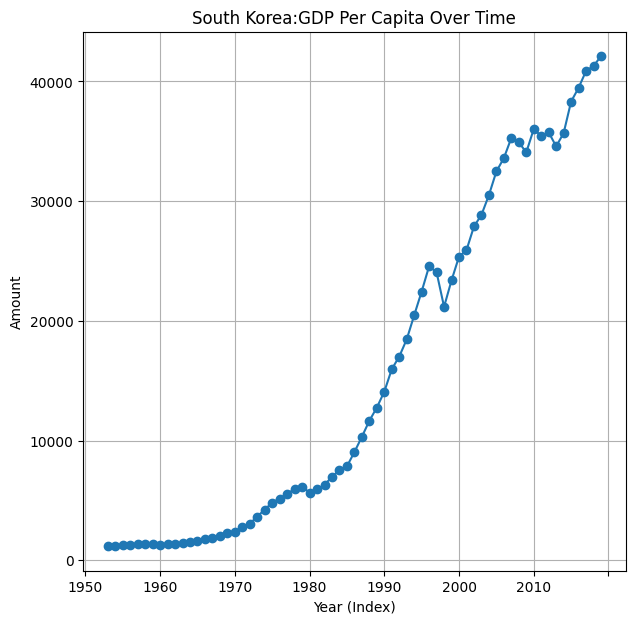

In [29]:

new_row.plot(kind='line', marker='o', title='South Korea:GDP Per Capita Over Time')

# Add labels and grid

plt.xlabel('Year (Index)')

plt.ylabel('Amount')

plt.grid(True)

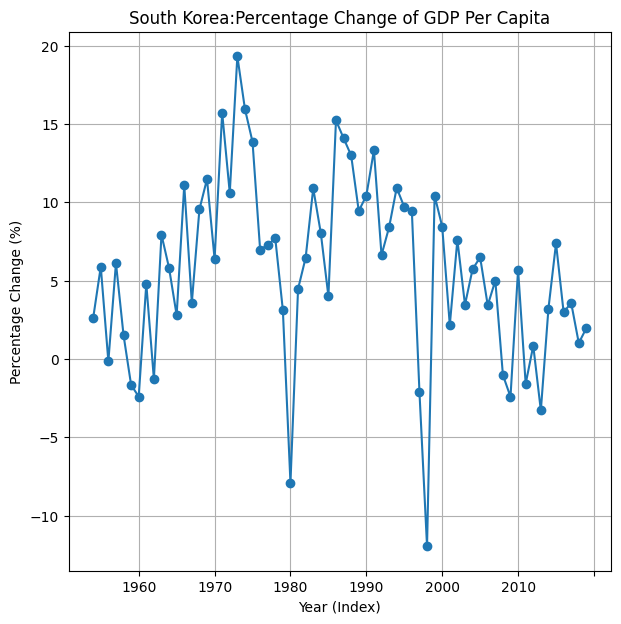

Average Growth Rate: 5.73%
Compound Annual Growth Rate (CAGR): nan%


In [30]:
# prompt: calculate the rate of growth from above

# ... (your existing code) ...

# Calculate the percentage change
percent_change = new_row.pct_change() * 100

# Plotting the percentage change
percent_change.plot(kind='line', marker='o', title='South Korea:Percentage Change of GDP Per Capita')

plt.xlabel('Year (Index)')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

# Calculate the average growth rate
average_growth_rate = percent_change.mean()
print(f"Average Growth Rate: {average_growth_rate:.2f}%")

# Calculate the compound annual growth rate (CAGR)
# Assuming the data represents yearly values
num_periods = len(new_row)  # Number of years
cagr = (new_row.iloc[-1] / new_row.iloc[0])**(1/num_periods) -1
cagr_percentage = cagr*100
print(f"Compound Annual Growth Rate (CAGR): {cagr_percentage:.2f}%")

## 2) South Korea Capital Stock

In [31]:
df_2=df.iloc[[4,5]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,KOR,Republic of Korea,cgdpo,Output-side real GDP at current PPPs (in mil. ...,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,...,1784489.75,1764806.125,1789598.875,1740677.875,1805884.875,1947442.5,2012039.875,2088576.875,2112982.25,2156917.25
5,KOR,Republic of Korea,cn,Capital stock at current PPPs (in mil. 2017US$),NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,...,7213039.00,7190924.500,7693654.000,8144687.500,8675896.000,9110202.0,9397864.000,9973875.000,10309477.00,10635833.00


In [32]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,28012.347656,30511.488281,31856.404297,32308.123047,...,1784489.75,1764806.125,1789598.875,1740677.875,1805884.875,1947442.5,2012039.875,2088576.875,2112982.25,2156917.25
5,NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,209273.000000,208808.703125,209456.781250,207249.031250,...,7213039.00,7190924.500,7693654.000,8144687.500,8675896.000,9110202.0,9397864.000,9973875.000,10309477.00,10635833.00


In [33]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,28012.347656,30511.488281,31856.404297,32308.123047,...,1784489.75,1764806.125,1789598.875,1740677.875,1805884.875,1947442.5,2012039.875,2088576.875,2112982.25,2156917.25
5,NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,209273.000000,208808.703125,209456.781250,207249.031250,...,7213039.00,7190924.500,7693654.000,8144687.500,8675896.000,9110202.0,9397864.000,9973875.000,10309477.00,10635833.00


In [34]:
new_row = new_df.iloc[1] / new_df.iloc[0]

# Append the new row to the DataFrame
new_df.loc['New'] = new_row

new_row

,0
1950,NaN
1951,NaN
1952,NaN
1953,8.643610
1954,8.355320
...,...
2015,4.678034
2016,4.670814
2017,4.775441
2018,4.879112


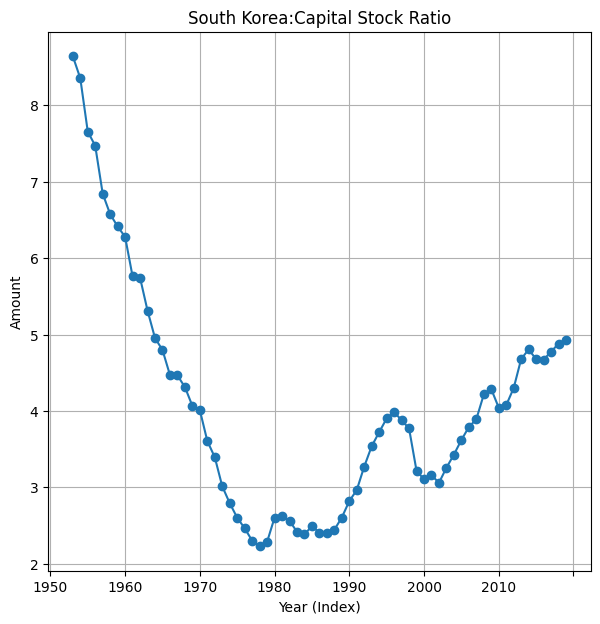

In [35]:
new_row.plot(kind='line', marker='o', title='South Korea:Capital Stock Ratio')

# Add labels and grid

plt.xlabel('Year (Index)')

plt.ylabel('Amount')

plt.grid(True)

## 3) South Korea Labor and Capital Share

In [36]:
df_2=df.iloc[[6]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,KOR,Republic of Korea,labsh,Share of labour compensation in GDP at current...,NaN,NaN,NaN,0.64677,0.64677,0.64677,...,0.49587,0.503741,0.508526,0.511417,0.518179,0.521539,0.519991,0.517249,0.517249,0.517249


In [37]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,NaN,NaN,NaN,0.64677,0.64677,0.64677,0.64677,0.64677,0.64677,0.64677,...,0.49587,0.503741,0.508526,0.511417,0.518179,0.521539,0.519991,0.517249,0.517249,0.517249


In [38]:
# prompt: Create a row of 1 minus the values of the row above

# Calculate the difference between consecutive rows
diff_row = 1 - new_df.iloc[0]

# Append the new row to the DataFrame
new_df.loc['Capital Share'] = diff_row

new_df

<ipython-input-38-2c82dfe0dba5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc['Capital Share'] = diff_row


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,NaN,NaN,NaN,0.64677,0.64677,0.64677,0.64677,0.64677,0.64677,0.64677,...,0.49587,0.503741,0.508526,0.511417,0.518179,0.521539,0.519991,0.517249,0.517249,0.517249
Capital Share,NaN,NaN,NaN,0.35323,0.35323,0.35323,0.35323,0.35323,0.35323,0.35323,...,0.50413,0.496259,0.491474,0.488583,0.481821,0.478461,0.480009,0.482751,0.482751,0.482751


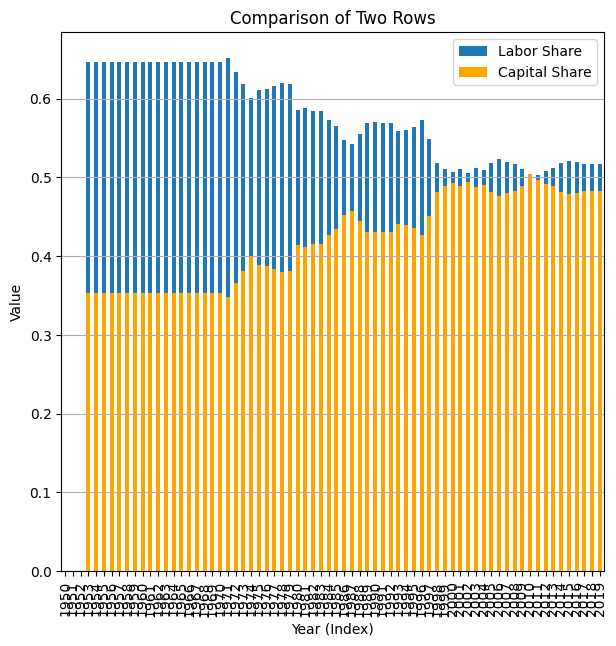

In [39]:
# prompt: bar graph of the two rows new_df comparing them

new_df.iloc[0].plot(kind='bar', label='Labor Share')

new_df.iloc[1].plot(kind='bar', label='Capital Share', color='orange')  # Use alpha for transparency

plt.xlabel('Year (Index)')
plt.ylabel('Value')
plt.title('Comparison of Two Rows')
plt.legend()
plt.grid(axis='y') #Add gridlines for better readability
plt.show()

## 4) South Average Rate of Return

In [40]:
df_2=df.iloc[[4,5,6]]

df_2

,ISO code,Country,Variable code,Variable name,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,KOR,Republic of Korea,cgdpo,Output-side real GDP at current PPPs (in mil. ...,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
5,KOR,Republic of Korea,cn,Capital stock at current PPPs (in mil. 2017US$),NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,...,7.213039e+06,7.190924e+06,7.693654e+06,8.144688e+06,8.675896e+06,9.110202e+06,9.397864e+06,9.973875e+06,1.030948e+07,1.063583e+07
6,KOR,Republic of Korea,labsh,Share of labour compensation in GDP at current...,NaN,NaN,NaN,0.646770,0.646770,0.646770,...,4.958703e-01,5.037408e-01,5.085257e-01,5.114167e-01,5.181786e-01,5.215386e-01,5.199910e-01,5.172493e-01,5.172493e-01,5.172493e-01


In [41]:
new_df = df_2.iloc[:, 4:]

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,28012.347656,30511.488281,31856.404297,32308.123047,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
5,NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,209273.000000,208808.703125,209456.781250,207249.031250,...,7.213039e+06,7.190924e+06,7.693654e+06,8.144688e+06,8.675896e+06,9.110202e+06,9.397864e+06,9.973875e+06,1.030948e+07,1.063583e+07
6,NaN,NaN,NaN,0.646770,0.646770,0.646770,0.646770,0.646770,0.646770,0.646770,...,4.958703e-01,5.037408e-01,5.085257e-01,5.114167e-01,5.181786e-01,5.215386e-01,5.199910e-01,5.172493e-01,5.172493e-01,5.172493e-01


In [42]:
diff_row = 1 - new_df.iloc[2]

# Append the new row to the DataFrame
new_df.loc['Capital Share'] = diff_row

new_df

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,NaN,NaN,NaN,24681.039062,25566.361328,27445.583984,28012.347656,30511.488281,31856.404297,32308.123047,...,1.784490e+06,1.764806e+06,1.789599e+06,1.740678e+06,1.805885e+06,1.947442e+06,2.012040e+06,2.088577e+06,2.112982e+06,2.156917e+06
5,NaN,NaN,NaN,213333.265625,213615.140625,210166.296875,209273.000000,208808.703125,209456.781250,207249.031250,...,7.213039e+06,7.190924e+06,7.693654e+06,8.144688e+06,8.675896e+06,9.110202e+06,9.397864e+06,9.973875e+06,1.030948e+07,1.063583e+07
6,NaN,NaN,NaN,0.646770,0.646770,0.646770,0.646770,0.646770,0.646770,0.646770,...,4.958703e-01,5.037408e-01,5.085257e-01,5.114167e-01,5.181786e-01,5.215386e-01,5.199910e-01,5.172493e-01,5.172493e-01,5.172493e-01
Capital Share,NaN,NaN,NaN,0.353230,0.353230,0.353230,0.353230,0.353230,0.353230,0.353230,...,5.041297e-01,4.962592e-01,4.914743e-01,4.885833e-01,4.818214e-01,4.784614e-01,4.800090e-01,4.827507e-01,4.827507e-01,4.827507e-01


In [43]:
# prompt: Capital share mulitiplied by first row

capital_share = new_df.loc['Capital Share']
first_row = new_df.iloc[0]

multiplied_result = capital_share * first_row
multiplied_result

,0
1950,NaN
1951,NaN
1952,NaN
1953,8.718080e+03
1954,9.030803e+03
...,...
2015,9.317760e+05
2016,9.657973e+05
2017,1.008262e+06
2018,1.020044e+06


In [44]:
divided_result = multiplied_result / new_df.iloc[1]
divided_result

,0
1950,NaN
1951,NaN
1952,NaN
1953,0.040866
1954,0.042276
...,...
2015,0.102278
2016,0.102768
2017,0.101090
2018,0.098942


In [45]:

hundred_times_divided_result = divided_result * 100
hundred_times_divided_result

,0
1950,NaN
1951,NaN
1952,NaN
1953,4.086602
1954,4.227604
...,...
2015,10.227831
2016,10.276774
2017,10.109030
2018,9.894233


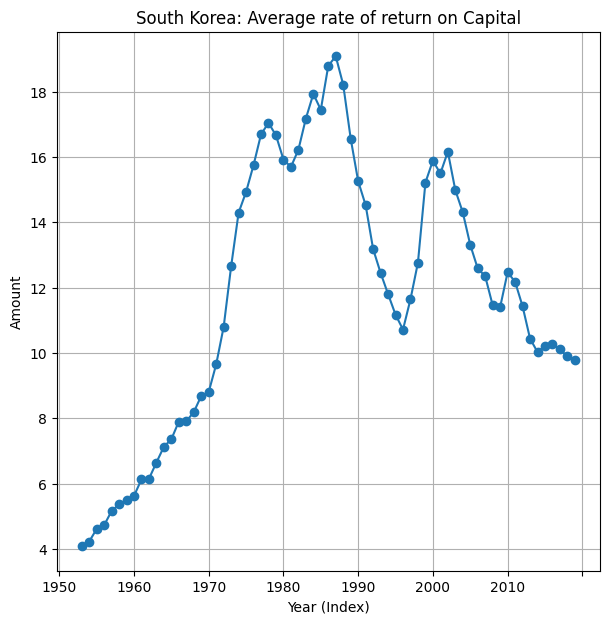

In [46]:
hundred_times_divided_result.plot(kind='line', marker='o', title='South Korea: Average rate of return on Capital')

# Add labels and grid

plt.xlabel('Year (Index)')

plt.ylabel('Amount')

plt.grid(True)